# Sales Prediction for Big Mart Outlets
The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and predict the sales of each product at a particular outlet.

Using this model, BigMart will try to understand the properties of products and outlets which play a key role in increasing sales.

Please note that the data may have missing values as some stores might not report all the data due to technical glitches. Hence, it will be required to treat them accordingly. 

### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
import datetime as dt

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
import pickle

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from xgboost import XGBRFRegressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import OrdinalEncoder,PolynomialFeatures, StandardScaler

C:\Users\pritj\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


### Importing the data

In [2]:
df_train=pd.read_csv('train.csv')

In [3]:
df_test=pd.read_csv('test.csv')

In [4]:
DF_test=df_test.copy()

In [5]:
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [6]:
DF_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [7]:
DF_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [9]:
df_train['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [10]:
df_train['Outlet_Type'].value_counts()

Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: count, dtype: int64

In [11]:
df_train['Outlet_Location_Type'].value_counts()

Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: count, dtype: int64

In [12]:
df_train['Outlet_Size'].value_counts()

Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64

## There can be multiple possibilities for the sales:
### 1.On basis of item:
### a.Item visibility in store: The location of product in a store will impact sales. Ones which are right at entrance will catch the eye of customer first rather than the ones in back.
### b.Product Frequency: More frequent products will have high Sales.

### 2.On basis of store:

### a.City type: Stores located in Tier1 cities should have higher sales because of the higher income levels of people there.
### b.Store capacity: Stores which are very big in size should have higher sales as they act like one-stop-shops for people

### Checking null per column

In [13]:
df_train.isnull().sum().sort_values(ascending=False)

Outlet_Size                  2410
Item_Weight                  1463
Item_Identifier                 0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [14]:
DF_test.isnull().sum().sort_values(ascending=False)

Outlet_Size                  1606
Item_Weight                   976
Item_Identifier                 0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [15]:
df_train.isnull().sum()*100/len(df_train)

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

In [16]:
DF_test.isnull().sum()*100/len(DF_test)

Item_Identifier               0.000000
Item_Weight                  17.180074
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.269671
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
dtype: float64

In [17]:
df_train.shape

(8523, 12)

### Lets check if we drop nulls what is the shape we are left with

In [18]:
DF=df_train.dropna()

In [19]:
DF.shape

(4650, 12)

### Almost half the rows got deleted we have to impute the values

### Handling missing value of the numeric column

In [20]:
df_train['Item_Weight'].isnull().any()

True

## Univariate Imputations
### We will try Mean, median,Interpolation

In [21]:
mean_weight=df_train['Item_Weight'].mean()
median_weight=df_train['Item_Weight'].median()

In [22]:
print(mean_weight,median_weight)

12.857645184135976 12.6


In [23]:
df_train['Item_Weight_mean']=df_train['Item_Weight'].fillna(mean_weight)
df_train['Item_Weight_median']=df_train['Item_Weight'].fillna(median_weight)

### We will check on the variance of the distribution before and after imputation

In [24]:
print('Variance of the original data',df_train['Item_Weight'].var())
print('Variance of the mean imputed data',df_train['Item_Weight_mean'].var())
print('Variance of the median imputed data',df_train['Item_Weight_median'].var())

Variance of the original data 21.56168825983637
Variance of the mean imputed data 17.860121735060453
Variance of the median imputed data 17.869561454073366


### Checking distribution of data before and after imputation

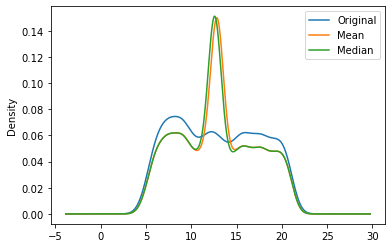

In [25]:
df_train['Item_Weight'].plot(kind='kde',label='Original')
df_train['Item_Weight_mean'].plot(kind='kde',label='Mean')
df_train['Item_Weight_median'].plot(kind='kde',label='Median')

plt.legend()
plt.show()

<AxesSubplot:>

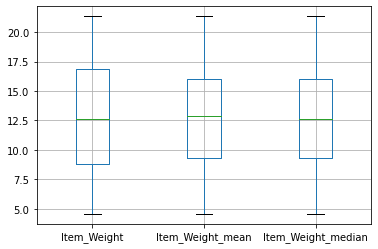

In [26]:
df_train[['Item_Weight','Item_Weight_mean','Item_Weight_median']].boxplot()

### This imputation has caused data to distribute more towards the central tendancy i.e. mean 

### Forward and backward fill

In [27]:
df_train['Item_Weight_ffill']=df_train['Item_Weight'].fillna(method='ffill') 
df_train['Item_Weight_bfill']=df_train['Item_Weight'].fillna(method='bfill') 

In [28]:
print('Variance of the original data',df_train['Item_Weight'].var())
print('Variance of the ffill imputed data',df_train['Item_Weight_ffill'].var())
print('Variance of the bfill imputed data',df_train['Item_Weight_bfill'].var())

Variance of the original data 21.56168825983637
Variance of the ffill imputed data 21.44634608085702
Variance of the bfill imputed data 21.54339553216808


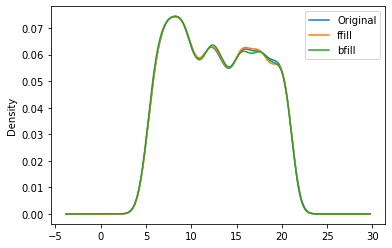

In [29]:
df_train['Item_Weight'].plot(kind='kde',label='Original')
df_train['Item_Weight_ffill'].plot(kind='kde',label='ffill')
df_train['Item_Weight_bfill'].plot(kind='kde',label='bfill')

plt.legend()
plt.show()

<AxesSubplot:>

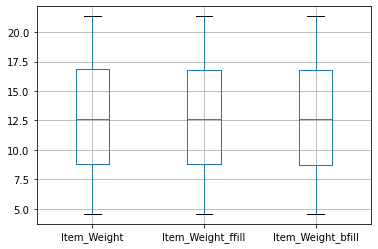

In [30]:
df_train[['Item_Weight','Item_Weight_ffill','Item_Weight_bfill']].boxplot()

### Interpolation

In [31]:
df_train['Item_Weight_interpolation']=df_train['Item_Weight'].interpolate(method='linear') 

In [32]:
print('Variance of the original data',df_train['Item_Weight'].var())
print('Variance of the interpolation imputed data',df_train['Item_Weight_interpolation'].var())

Variance of the original data 21.56168825983637
Variance of the interpolation imputed data 19.758685821975615


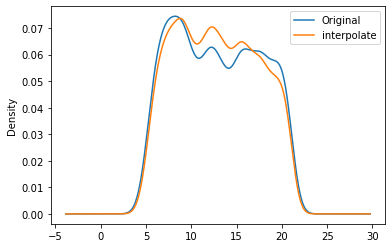

In [33]:
df_train['Item_Weight'].plot(kind='kde',label='Original')
df_train['Item_Weight_interpolation'].plot(kind='kde',label='interpolate')

plt.legend()
plt.show()

<AxesSubplot:>

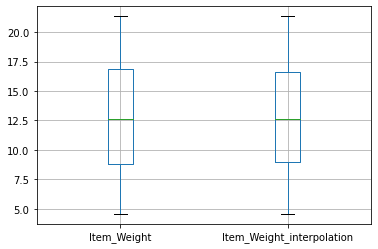

In [34]:
df_train[['Item_Weight','Item_Weight_interpolation']].boxplot()

# Item_weight with backfill shows more similarity with the original data

## Multivariate imputation

In [35]:
knn=KNNImputer(n_neighbors=10,weights='distance')

In [36]:
df_train['knn_imputed']=knn.fit_transform(df_train[['Item_Weight']]).ravel()

In [37]:
print('Variance of the original data',df_train['Item_Weight'].var())
print('Variance of the interpolation imputed data',df_train['knn_imputed'].var())

Variance of the original data 21.56168825983637
Variance of the interpolation imputed data 17.860121735060453


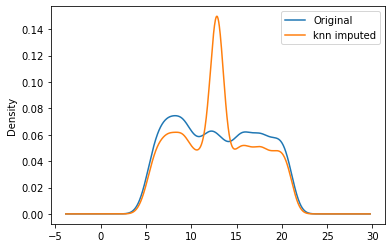

In [38]:
df_train['Item_Weight'].plot(kind='kde',label='Original')
df_train['knn_imputed'].plot(kind='kde',label='knn imputed')

plt.legend()
plt.show()

<AxesSubplot:>

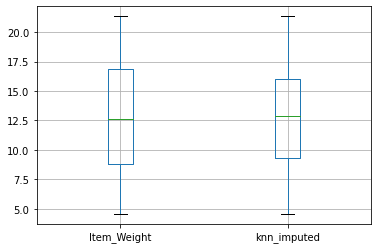

In [39]:
df_train[['Item_Weight','knn_imputed']].boxplot()

### We will go ahead and impute using bfill finally

In [40]:
DF_test['Item_Weight'].fillna(method='bfill',inplace=True) 

In [41]:
df_train=df_train.drop(['knn_imputed','Item_Weight','Item_Weight_interpolation','Item_Weight_ffill','Item_Weight_mean','Item_Weight_median'],axis=1)

In [42]:
df_train.head()

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_bfill
0,FDA15,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,9.30
1,DRC01,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,5.92
2,FDN15,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,17.50
3,FDX07,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,19.20
4,NCD19,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,8.93


In [43]:
df_train.isnull().sum()

Item_Identifier                 0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
Item_Weight_bfill               0
dtype: int64

In [44]:
DF_test.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

## Imputing on the categorical column

In [45]:
df_train['Outlet_Size'].value_counts()

Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64

### We will not impute the value of Outlet size directly as it can be the case that certain outlets are not present in sub-urbs or tier3 cities we have to impute based upon other category like Outlet type which can be a good feature for correlation to impute upon as it would tell the distribution of these different types in different cities 

In [46]:
mode_outlet=df_train.pivot_table(values='Outlet_Size',columns='Outlet_Type',aggfunc=lambda x:x.mode())

In [47]:
mode_outlet_test=DF_test.pivot_table(values='Outlet_Size',columns='Outlet_Type',aggfunc=lambda x:x.mode())

### The above is showing most frequent outlet size for each outlet type

In [48]:
mode_outlet

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [49]:
mode_outlet_test

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [50]:
missing_values=df_train['Outlet_Size'].isnull()

In [51]:
missing_val=DF_test['Outlet_Size'].isnull()

In [52]:
df_train.loc[missing_values,'Outlet_Size']=df_train.loc[missing_values,'Outlet_Type'].apply(lambda x: mode_outlet[x])

In [53]:
DF_test.loc[missing_val,'Outlet_Size']=DF_test.loc[missing_val,'Outlet_Type'].apply(lambda x: mode_outlet_test[x])

In [54]:
df_train.isnull().sum()

Item_Identifier              0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
Item_Weight_bfill            0
dtype: int64

In [55]:
DF_test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

### Null values have been taken care of now

## Analysing other string value columns

In [56]:
object_=df_train.select_dtypes(include=['object']).columns.tolist()

In [57]:
object_

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

### Item_Identifier

In [58]:
df_train['Item_Identifier'].value_counts().sample(10)

Item_Identifier
NCP02    4
FDH53    6
FDQ10    7
FDY34    5
FDY55    8
FDH10    8
FDF44    5
FDZ10    6
NCJ19    5
FDX10    4
Name: count, dtype: int64

### After taking a few samples we can see the first two characters are repeating in multiple sample values it seems they may stand for FD='food',nc='non-consumables',DR='drinks', we can hence reduce the categories to only three to reduce feature value complexity 

In [59]:
df_train['Item_Identifier']=df_train['Item_Identifier'].apply(lambda x:x[0:2])

In [60]:
DF_test['Item_Identifier']=DF_test['Item_Identifier'].apply(lambda x:x[0:2])

In [61]:
df_train['Item_Identifier'].value_counts()

Item_Identifier
FD    6125
NC    1599
DR     799
Name: count, dtype: int64

In [62]:
DF_test['Item_Identifier'].value_counts()

Item_Identifier
FD    4076
NC    1087
DR     518
Name: count, dtype: int64

### Item_Fat_Content

In [63]:
df_train['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

### We see certain terms are same but have been identified inconsistently we can make them consistent to reduce feature value complexity.

In [64]:
df_train.replace({'Item_Fat_Content':{'Low Fat':'LF','Regular':'reg','low fat':'LF'}},inplace=True)

In [65]:
DF_test.replace({'Item_Fat_Content':{'Low Fat':'LF','Regular':'reg','low fat':'LF'}},inplace=True)

In [66]:
df_train['Item_Fat_Content'].value_counts()

Item_Fat_Content
LF     5517
reg    3006
Name: count, dtype: int64

In [67]:
DF_test['Item_Fat_Content'].value_counts()

Item_Fat_Content
LF     3668
reg    2013
Name: count, dtype: int64

### Above have been made consistent

### Item_Type

In [68]:
df_train['Item_Type'].value_counts()

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64

### Outlet_Identifier

In [69]:
df_train['Outlet_Identifier'].value_counts()

Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: count, dtype: int64

### Analysing the numeric columns

In [70]:
numeric= df_train.select_dtypes(include=['float64', 'int64']).columns.tolist()
numeric

['Item_Visibility',
 'Item_MRP',
 'Outlet_Establishment_Year',
 'Item_Outlet_Sales',
 'Item_Weight_bfill']

In [71]:
df_train[numeric].describe().T

,count,mean,std,min,25%,50%,75%,max
Item_Visibility,8523.0,0.066132,0.051598,0.000,0.026989,0.053931,0.094585,0.328391
Item_MRP,8523.0,140.992782,62.275067,31.290,93.826500,143.012800,185.643700,266.888400
Outlet_Establishment_Year,8523.0,1997.831867,8.371760,1985.000,1987.000000,1999.000000,2004.000000,2009.000000
Item_Outlet_Sales,8523.0,2181.288914,1706.499616,33.290,834.247400,1794.331000,3101.296400,13086.964800
Item_Weight_bfill,8523.0,12.812795,4.641486,4.555,8.750000,12.600000,16.750000,21.350000


### In the above analysis we see there are zero visibiility item which cannot be possible it is some data error

### Item_Visibility

In [72]:
df_train['Item_Visibility'].value_counts()

Item_Visibility
0.000000    526
0.076975      3
0.162462      2
0.076841      2
0.073562      2
           ... 
0.013957      1
0.110460      1
0.124646      1
0.054142      1
0.044878      1
Name: count, Length: 7880, dtype: int64

In [73]:
DF_test['Item_Visibility'].value_counts()

Item_Visibility
0.000000    353
0.060879      2
0.097213      2
0.058461      2
0.058132      2
           ... 
0.082382      1
0.026175      1
0.155144      1
0.069557      1
0.104720      1
Name: count, Length: 5277, dtype: int64

<AxesSubplot:>

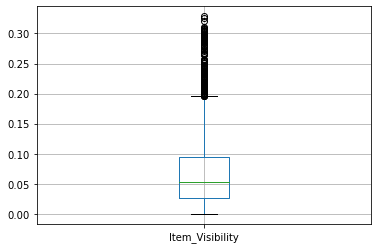

In [74]:
df_train[['Item_Visibility']].boxplot()

<AxesSubplot:ylabel='Item_Visibility'>

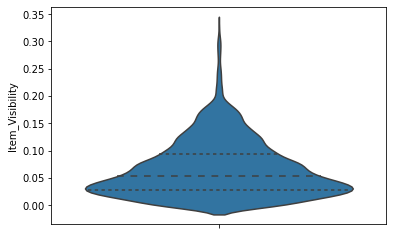

In [75]:
sns.violinplot(data=df_train, y='Item_Visibility', inner='quartile')

### We can see from above the the data in squeezed more towards zero we have to rectify it we can again use different imputation methods to do it

### We will replace the zeros with nan values

In [76]:
df_train['Item_Visibility'].replace(0,np.nan,inplace=True)

In [77]:
DF_test['Item_Visibility'].replace(0,np.nan,inplace=True)

In [78]:
df_train['Item_Visibility'].value_counts()

Item_Visibility
0.076975    3
0.162462    2
0.076841    2
0.073562    2
0.135708    2
           ..
0.013957    1
0.110460    1
0.124646    1
0.054142    1
0.044878    1
Name: count, Length: 7879, dtype: int64

In [79]:
df_test['Item_Visibility'].value_counts()

Item_Visibility
0.000000    353
0.060879      2
0.097213      2
0.058461      2
0.058132      2
           ... 
0.082382      1
0.026175      1
0.155144      1
0.069557      1
0.104720      1
Name: count, Length: 5277, dtype: int64

### Multivariate imputation

In [80]:
KNN=KNNImputer(n_neighbors=10,weights='distance')

In [81]:
df_train['knn_imputed_visibility']=KNN.fit_transform(df_train[['Item_Visibility']]).ravel()

In [82]:
print('Variance of the original data',df_train['Item_Visibility'].var())
print('Variance of the knn imputed data',df_train['knn_imputed_visibility'].var())

Variance of the original data 0.002530850276041738
Variance of the knn imputed data 0.00237463961596219


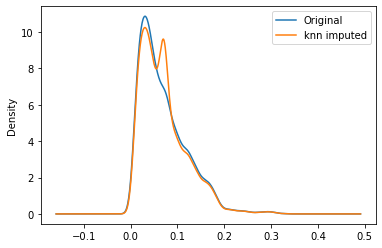

In [83]:
df_train['Item_Visibility'].plot(kind='kde',label='Original')
df_train['knn_imputed_visibility'].plot(kind='kde',label='knn imputed')

plt.legend()
plt.show()

<AxesSubplot:>

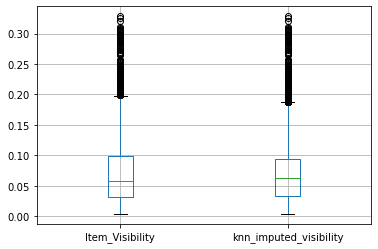

In [84]:
df_train[['Item_Visibility','knn_imputed_visibility']].boxplot()

### Interpolation

In [85]:
df_train['Item_Visibility_interpolation']=df_train['Item_Visibility'].interpolate(method='linear') 

In [86]:
print('Variance of the original data',df_train['Item_Visibility'].var())
print('Variance of the interpolation imputed data',df_train['Item_Visibility_interpolation'].var())

Variance of the original data 0.002530850276041738
Variance of the interpolation imputed data 0.0024495722448651352


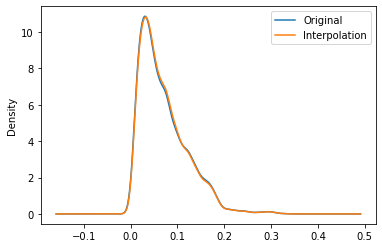

In [87]:
df_train['Item_Visibility'].plot(kind='kde',label='Original')
df_train['Item_Visibility_interpolation'].plot(kind='kde',label='Interpolation')

plt.legend()
plt.show()

In [88]:
DF_test['Item_Visibility'].interpolate(method='linear',inplace=True) 

<AxesSubplot:>

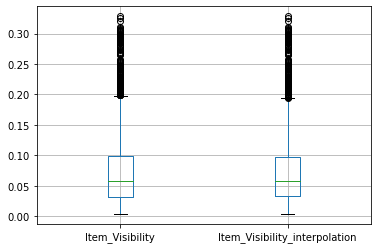

In [89]:
df_train[['Item_Visibility','Item_Visibility_interpolation']].boxplot()

### Interpolation is giving the best result we will take that into consideration and drop other columns

In [90]:
df_train.columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Outlet_Sales', 'Item_Weight_bfill', 'knn_imputed_visibility',
       'Item_Visibility_interpolation'],
      dtype='object')

In [91]:
df_train.drop(columns=['knn_imputed_visibility','Item_Visibility'],inplace=True)

In [92]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Item_Identifier                8523 non-null   object 
 1   Item_Fat_Content               8523 non-null   object 
 2   Item_Type                      8523 non-null   object 
 3   Item_MRP                       8523 non-null   float64
 4   Outlet_Identifier              8523 non-null   object 
 5   Outlet_Establishment_Year      8523 non-null   int64  
 6   Outlet_Size                    8523 non-null   object 
 7   Outlet_Location_Type           8523 non-null   object 
 8   Outlet_Type                    8523 non-null   object 
 9   Item_Outlet_Sales              8523 non-null   float64
 10  Item_Weight_bfill              8523 non-null   float64
 11  Item_Visibility_interpolation  8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage:

### Item_MRP

In [93]:
df_train['Item_MRP'].value_counts()

Item_MRP
172.0422    7
170.5422    6
196.5084    6
188.1872    6
142.0154    6
           ..
97.3384     1
83.1934     1
96.6752     1
152.6682    1
75.4670     1
Name: count, Length: 5938, dtype: int64

sns.histplot(data=df_train,y='Item_MRP',kde='True')

### Outlet_Establishment_Year

In [94]:
df_train['Outlet_Establishment_Year'].value_counts()

Outlet_Establishment_Year
1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: count, dtype: int64

sns.histplot(data=df_train,y='Outlet_Establishment_Year',kde='True')

### We can look into these numbers as the duration for which the outlet is in existence

In [95]:
current_year= dt.datetime.today().year
current_year

2025

In [96]:
df_train['Outlet_age']=current_year-df_train['Outlet_Establishment_Year']

In [97]:
df_train['Outlet_age'].value_counts()

Outlet_age
40    1463
38     932
26     930
28     930
21     930
23     929
16     928
18     926
27     555
Name: count, dtype: int64

In [98]:
DF_test['Outlet_age']=current_year-DF_test['Outlet_Establishment_Year']

In [99]:
del df_train['Outlet_Establishment_Year']

In [100]:
del DF_test['Outlet_Establishment_Year']

In [101]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Item_Identifier                8523 non-null   object 
 1   Item_Fat_Content               8523 non-null   object 
 2   Item_Type                      8523 non-null   object 
 3   Item_MRP                       8523 non-null   float64
 4   Outlet_Identifier              8523 non-null   object 
 5   Outlet_Size                    8523 non-null   object 
 6   Outlet_Location_Type           8523 non-null   object 
 7   Outlet_Type                    8523 non-null   object 
 8   Item_Outlet_Sales              8523 non-null   float64
 9   Item_Weight_bfill              8523 non-null   float64
 10  Item_Visibility_interpolation  8523 non-null   float64
 11  Outlet_age                     8523 non-null   int64  
dtypes: float64(4), int64(1), object(7)
memory usage:

In [102]:
DF_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Item_Identifier       5681 non-null   object 
 1   Item_Weight           5681 non-null   float64
 2   Item_Fat_Content      5681 non-null   object 
 3   Item_Visibility       5681 non-null   float64
 4   Item_Type             5681 non-null   object 
 5   Item_MRP              5681 non-null   float64
 6   Outlet_Identifier     5681 non-null   object 
 7   Outlet_Size           5681 non-null   object 
 8   Outlet_Location_Type  5681 non-null   object 
 9   Outlet_Type           5681 non-null   object 
 10  Outlet_age            5681 non-null   int64  
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


### lets make the column names consistent 

In [103]:
df_train.rename(columns={'Item_Weight_bfill':'Item_Weight','Item_Visibility_interpolation':'Item_Visibility'},inplace=True)

In [104]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Item_Identifier       8523 non-null   object 
 1   Item_Fat_Content      8523 non-null   object 
 2   Item_Type             8523 non-null   object 
 3   Item_MRP              8523 non-null   float64
 4   Outlet_Identifier     8523 non-null   object 
 5   Outlet_Size           8523 non-null   object 
 6   Outlet_Location_Type  8523 non-null   object 
 7   Outlet_Type           8523 non-null   object 
 8   Item_Outlet_Sales     8523 non-null   float64
 9   Item_Weight           8523 non-null   float64
 10  Item_Visibility       8523 non-null   float64
 11  Outlet_age            8523 non-null   int64  
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


## Hnadling the categorical features for Machine understanding

In [105]:
data_oe=df_train.copy()
cat_cols=df_train.select_dtypes(include=['object']).columns
cat_cols_test=DF_test.select_dtypes(include=['object']).columns

## Train

In [106]:
for col in cat_cols:
    oe=OrdinalEncoder()
    data_oe[col]=oe.fit_transform(data_oe[[col]])

In [107]:
data_oe.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight,Item_Visibility,Outlet_age
0,1.0,0.0,4.0,249.8092,9.0,1.0,0.0,1.0,3735.1380,9.30,0.016047,26
1,0.0,1.0,14.0,48.2692,3.0,1.0,2.0,2.0,443.4228,5.92,0.019278,16
2,1.0,0.0,10.0,141.6180,9.0,1.0,0.0,1.0,2097.2700,17.50,0.016760,26
3,1.0,1.0,6.0,182.0950,0.0,2.0,2.0,0.0,732.3800,19.20,0.015755,27
4,2.0,0.0,9.0,53.8614,1.0,0.0,2.0,1.0,994.7052,8.93,0.014751,38


## Test

In [108]:
for col in cat_cols_test:
    oe=OrdinalEncoder()
    DF_test[col]=oe.fit_transform(DF_test[[col]])

In [109]:
DF_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_age
0,1.0,20.750,0.0,0.007565,13.0,107.8622,9.0,1.0,0.0,1.0,26
1,1.0,8.300,1.0,0.038428,4.0,87.3198,2.0,2.0,1.0,1.0,18
2,2.0,14.600,0.0,0.099575,11.0,241.7538,0.0,2.0,2.0,0.0,27
3,1.0,7.315,0.0,0.015388,13.0,155.0340,2.0,2.0,1.0,1.0,18
4,1.0,9.800,1.0,0.118599,4.0,234.2300,5.0,1.0,2.0,3.0,40


In [110]:
X=data_oe.drop('Item_Outlet_Sales',axis=1)
y=data_oe['Item_Outlet_Sales']

In [111]:
X.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Weight,Item_Visibility,Outlet_age
0,1.0,0.0,4.0,249.8092,9.0,1.0,0.0,1.0,9.30,0.016047,26
1,0.0,1.0,14.0,48.2692,3.0,1.0,2.0,2.0,5.92,0.019278,16
2,1.0,0.0,10.0,141.6180,9.0,1.0,0.0,1.0,17.50,0.016760,26
3,1.0,1.0,6.0,182.0950,0.0,2.0,2.0,0.0,19.20,0.015755,27
4,2.0,0.0,9.0,53.8614,1.0,0.0,2.0,1.0,8.93,0.014751,38


In [112]:
y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

## Modelling

### Randomforest

In [113]:
rf= RandomForestRegressor(n_estimators=100,random_state=42)
score_rf=cross_val_score(rf,X,y,cv=5,scoring='r2')

In [114]:
print(score_rf.mean())

0.553360518997235


### Linear regression

In [115]:
lin_reg = LinearRegression()

In [116]:
steps = [
    ('scaler', StandardScaler()),
    ('poly',   PolynomialFeatures(degree=2)),
    ('model',  LinearRegression())
       ]

lin_reg_pipeline = Pipeline(steps)

score_lin=cross_val_score(lin_reg_pipeline,X,y,cv=5,scoring='r2')
#lasso_pipeline.fit(X_train, y_train)

print(score_lin.mean())

0.5885820359986693


### Ridge

In [117]:
steps = [
            ('scaler', StandardScaler()),
            ('poly'  , PolynomialFeatures(degree=2)),
            ('model' , Ridge(alpha=7, fit_intercept=True))
       ]

ridge_pipeline = Pipeline(steps)
score_ridge=cross_val_score(ridge_pipeline,X,y,cv=5,scoring='r2')
#lasso_pipeline.fit(X_train, y_train)

print(score_ridge.mean())

0.5888997390879777


### Lasso

In [118]:
steps = [
            ('scaler', StandardScaler()),
            ('poly', PolynomialFeatures(degree=2)),
            ('model', Lasso(alpha=0.2, fit_intercept=True))
        ]

lasso_pipeline = Pipeline(steps)
score_lass=cross_val_score(lasso_pipeline,X,y,cv=5,scoring='r2')
#lasso_pipeline.fit(X_train, y_train)

print(score_lass.mean())

C:\Users\pritj\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 293566194.07087517, tolerance: 1954866.4647094163
  model = cd_fast.enet_coordinate_descent(
C:\Users\pritj\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 271755275.25794125, tolerance: 2001724.4948117977
  model = cd_fast.enet_coordinate_descent(
C:\Users\pritj\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 289790036.2380161, tolerance: 2014946.6097111206
  model = cd_fast.enet_coordinate_descent(
C:\Users\pritj\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceW

0.5889822321204508


C:\Users\pritj\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 283507086.78439045, tolerance: 1971962.1232170938
  model = cd_fast.enet_coordinate_descent(


### XGBRFRegressor

In [119]:
xgbr=XGBRFRegressor(n_estimators=100,random_state=42)

In [120]:
score_xgbr=cross_val_score(xgbr,X,y,cv=5,scoring='r2')

In [121]:
print(score_xgbr.mean())

0.5957681220954184


## Feature importance

In [122]:
xgr=XGBRFRegressor(n_estimators=100,random_state=42)

In [123]:
xgr1=xgr.fit(X,y)
pd.DataFrame({'feature':X.columns,'XGBRF_impoprtance':xgr1.feature_importances_ }).sort_values(by='XGBRF_impoprtance',ascending=False)

,feature,XGBRF_impoprtance
7,Outlet_Type,0.459380
10,Outlet_age,0.186020
3,Item_MRP,0.161702
4,Outlet_Identifier,0.113821
5,Outlet_Size,0.061992
6,Outlet_Location_Type,0.007790
8,Item_Weight,0.002982
9,Item_Visibility,0.002965
2,Item_Type,0.001583
0,Item_Identifier,0.001202


### We will consider first 4 important features

In [124]:
X=X[['Outlet_Type','Outlet_age','Item_MRP','Outlet_Identifier']]

In [125]:
xgr1=xgr.fit(X,y)

In [126]:
score_xgr1=cross_val_score(xgr1,X,y,cv=5,scoring='r2')

In [127]:
print(score_xgr1.mean())

0.5965499829614882


### XGBRFRegressor shows the best result so we will move ahead with that

## Predicting the y_test

In [128]:
X_test=DF_test[['Outlet_Type','Outlet_age','Item_MRP','Outlet_Identifier']]

In [129]:
y_pred=xgr1.predict(X_test)

In [130]:
df_test['Item_Outlet_Sales_predicted']=y_pred

In [131]:
df_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales_predicted
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,1615.316040
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1,1439.051758
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store,551.677185
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1,2607.786377
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,5863.604004


In [132]:
df_test.to_csv('Final_submission.csv')